In [13]:
# do imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import seaborn as sns

In [39]:
#data import
df = pd.read_excel('tomato_metabolites.xlsx') #metabolite data table
metab_list = df.columns[2:]             #list of metabolites
df_variants = pd.read_excel('tomato_varieties.xlsx') #tomato accession with group
df_variants = df_variants[['Individual code', 'Group']]


In [73]:
#create number ID for accession
df['Accession ID'] = df['Accessions'].str[3:].astype(int)

#separate by rep
df_rep1 = df[df['Replicate'] == 1] 
df_rep2 = df[df['Replicate'] == 2]

#add group information to separated tables
df_final = df_variants.merge(df, right_on = 'Accessions', left_on = 'Individual code')
df_final1 = df_variants.merge(df_rep1, right_on = 'Accessions', left_on = 'Individual code')
df_final2 = df_variants.merge(df_rep2, right_on = 'Accessions', left_on = 'Individual code')

## Coefficient of variation

1.2175842161177635
1.3574629338061694
1.4204847074447586


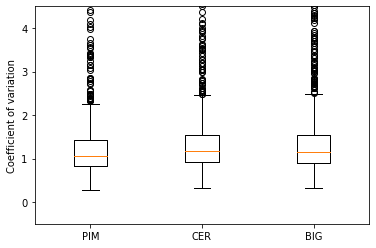

In [74]:
#Coefficient of variation for each metabolite across each group:

data = []
groups = ['PIM', 'CER', 'BIG']
for x in groups:
    mean = np.mean(df_final[df_final['Group'] == x])
    stdev = np.std(df_final[df_final['Group'] == x])
    data.append(stdev/mean)
plt.figure(figsize = (6, 4))
plt.boxplot(data)
plt.xticks([1, 2, 3], groups)
plt.ylim(-0.5, 4.5)
plt.ylabel('Coefficient of variation')
for x in data:
    print(np.mean(x))

## Log2 transformation 

In [75]:
rep1_logged = np.log2(df_rep1.iloc[:, 2:982])
rep2_logged = np.log2(df_rep2.iloc[:, 2:982])

Text(0.5, 1.0, 'post-log-transformation, SlFM0007')

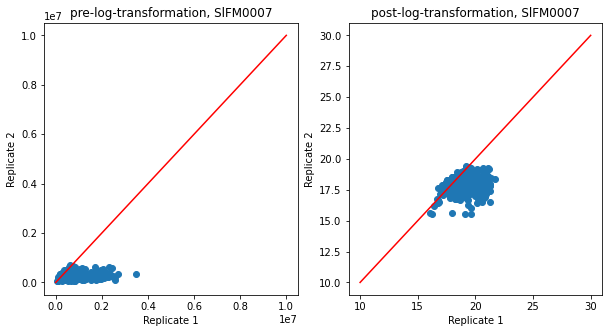

In [107]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot([0, 10**7], [0, 10**7], c = 'r')
ax[0].scatter(df_rep1.iloc[:, 2:]['SlFM0007'], df_rep2.iloc[:, 2:]['SlFM0007'])
ax[0].set_xlabel('Replicate 1')
ax[0].set_ylabel('Replicate 2')
ax[0].set_title('pre-log-transformation, SlFM0007')

ax[1].plot([10, 30], [10, 30], c = 'r')
ax[1].scatter(np.log2(df_rep1.iloc[:, 2:]['SlFM0007']), np.log2(df_rep2.iloc[:, 2:]['SlFM0007']))
ax[1].set_xlabel('Replicate 1')
ax[1].set_ylabel('Replicate 2')
ax[1].set_title('post-log-transformation, SlFM0007')

Text(0.5, 1.0, 'post-log-transformation, SlFM1194')

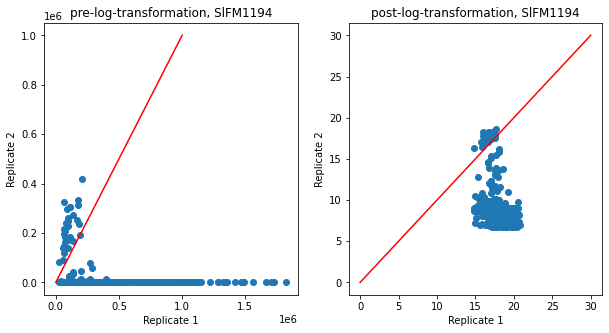

In [108]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].plot([0, 10**6], [0, 10**6], c = 'r')
ax[0].scatter(df_rep1.iloc[:, 2:]['SlFM1194'], df_rep2.iloc[:, 2:]['SlFM1194'])
ax[0].set_xlabel('Replicate 1')
ax[0].set_ylabel('Replicate 2')
ax[0].set_title('pre-log-transformation, SlFM1194')

ax[1].plot([0, 30], [0, 30], c = 'r')
ax[1].scatter(np.log2(df_rep1.iloc[:, 2:]['SlFM1194']), np.log2(df_rep2.iloc[:, 2:]['SlFM1194']))
ax[1].set_xlabel('Replicate 1')
ax[1].set_ylabel('Replicate 2')
ax[1].set_title('post-log-transformation, SlFM1194')

## Missing data

In [76]:
#percentage missing data
print(rep1_logged.isnull().values.sum(), '/', rep1_logged.size, '{0:.2f}'.format(rep1_logged.isnull().values.sum()/rep1_logged.size*100))
print(rep2_logged.isnull().values.sum(), '/', rep2_logged.size, '{0:.2f}'.format(rep2_logged.isnull().values.sum()/rep2_logged.size*100))

5999 / 433160 1.38
10024 / 433160 2.31


In [77]:
all_data

,Accessions,Replicate,SlFM0001,SlFM0002,SlFM0003,SlFM0004,SlFM0006,SlFM0007,SlFM0008,SlFM0009,...,SlFM1994,SlFM1995,SlFM1996,SlFM1997,SlFM1998,SlFM1999,SlFM2000,Accession ID,Individual code,Group
0,TS-1,1,27272.2500,7524.2000,9907.5500,52315.5500,184169.6502,469608.0716,118913.1213,13682.9000,...,80612.2997,NaN,48292.7999,20794.9000,3465.6500,85502.7499,6.060375e+05,1,TS-1,BIG
2,TS-2,1,6410.8000,8084.8000,11651.0000,13935.6500,224168.1084,376843.8492,54469.3201,6210.2500,...,13982.2500,NaN,35917.8999,19905.3500,3201.3000,95892.0000,5.537594e+05,2,TS-2,BIG
4,TS-3,1,4304.3000,8592.4500,1583.8500,3226.0000,186806.5001,268954.7998,29407.7134,4134.8000,...,28321.3999,NaN,63002.5499,38525.7499,3197.0000,89135.5502,6.466950e+05,3,TS-3,BIG
6,TS-4,1,24844.8500,9163.8000,5471.4500,23689.1000,461896.9999,425660.4489,169292.5499,5215.1000,...,24752.0000,NaN,56587.8498,27110.5000,4263.3500,103855.9999,6.140405e+05,4,TS-4,BIG
8,TS-5,1,9819.7500,8602.2000,10360.5000,6516.4500,187771.8005,231472.4006,67163.1000,7501.8000,...,17261.8500,NaN,16576.7500,11827.1000,2663.3000,42785.6501,2.820534e+05,5,TS-5,BIG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,TS-700,2,1024.1339,15674.8370,6543.4744,713.4160,25263.0431,232780.1655,165998.1203,32565.1276,...,3478.3260,NaN,60267.8250,7698.0752,2447.5941,56833.4006,6.828172e+05,700,TS-700,BIG
877,TS-701,2,1416.6685,6980.8179,2810.4091,537.1689,31818.4051,133001.0565,71476.1923,10509.2662,...,112663.5656,702.6445,800452.6841,200847.3457,9465.2746,650659.5221,1.000871e+06,701,TS-701,PIM
879,TS-702,2,438.0220,3787.6969,2214.4227,1923.8061,19143.4676,173469.9317,235927.9554,24402.5192,...,79619.9337,NaN,709818.6868,181926.3852,5936.2610,522218.5972,1.341707e+06,702,TS-702,CER
881,TS-731,2,NaN,15128.7994,NaN,673.8754,18180.2009,203976.3198,188506.9148,20064.3304,...,31712.1682,NaN,196670.0640,51841.5966,5889.3047,231417.7052,1.081862e+06,731,TS-731,CER


In [78]:
#creating full log data table and separate replicated with all data, including group

all_data = df.merge(df_variants, left_on = 'Accessions', right_on = 'Individual code').sort_values(by = ['Replicate','Accession ID'])
groups = all_data['Group'].iloc[:442]
rep1_logged['Group'] = list(groups)
rep2_logged['Group'] = list(groups)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(249.0, 0.5, 'Tomato Sample')

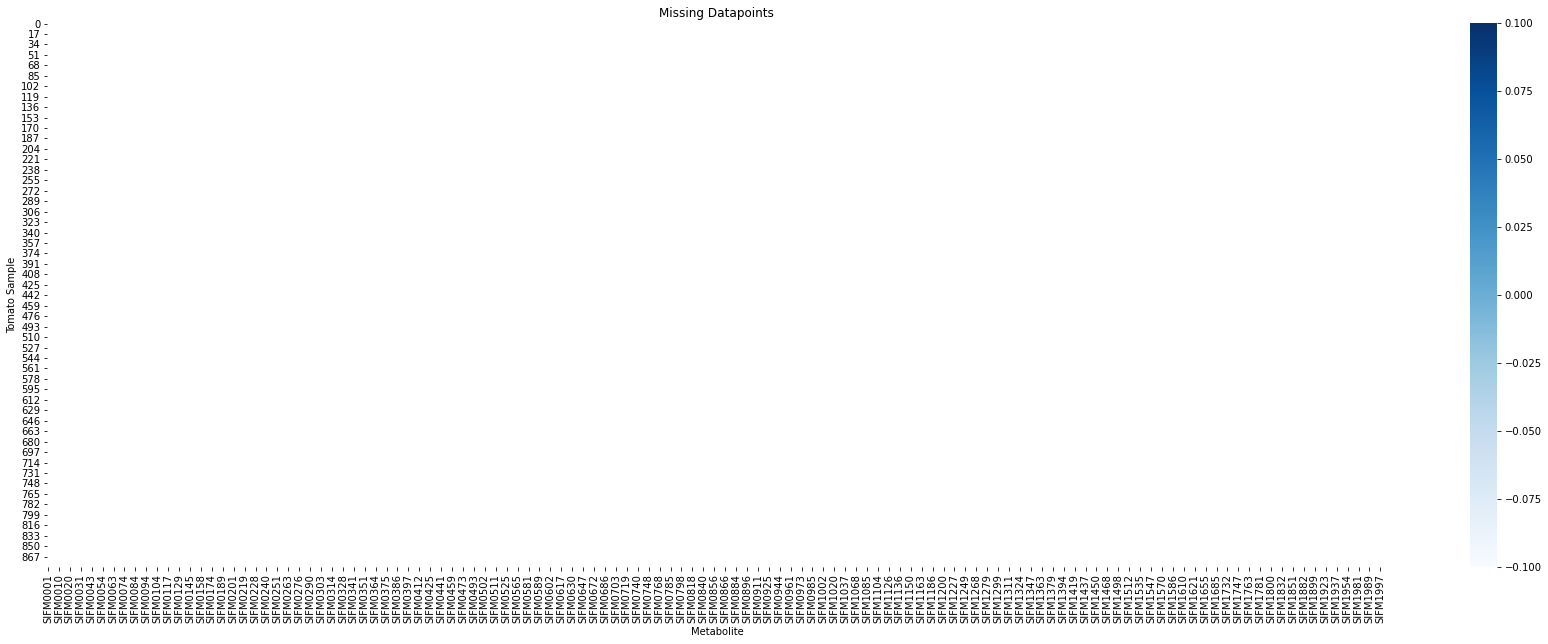

In [79]:
#creating heatmap to visualize missing data trends - not sure why the image isn't showing up, it was last time!!)
plt.figure(figsize = (30, 10))
#adding the dataframes with data converted to int
sns.heatmap(rep1_logged.isnull().astype(int)  + rep2_logged.isnull().astype(int), cmap = 'Blues') 
plt.title('Missing Datapoints')
#2 = both missing, 1 = missing in one dataset, 0 = none missing
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')


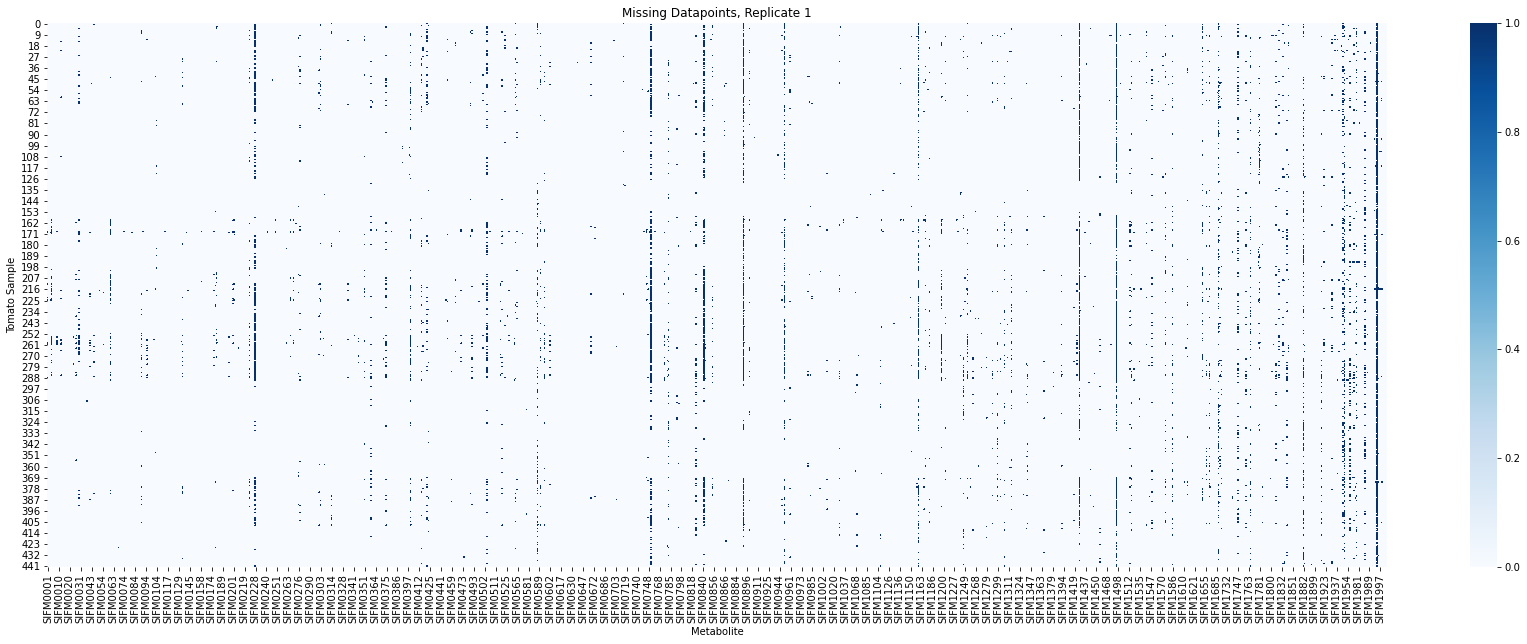

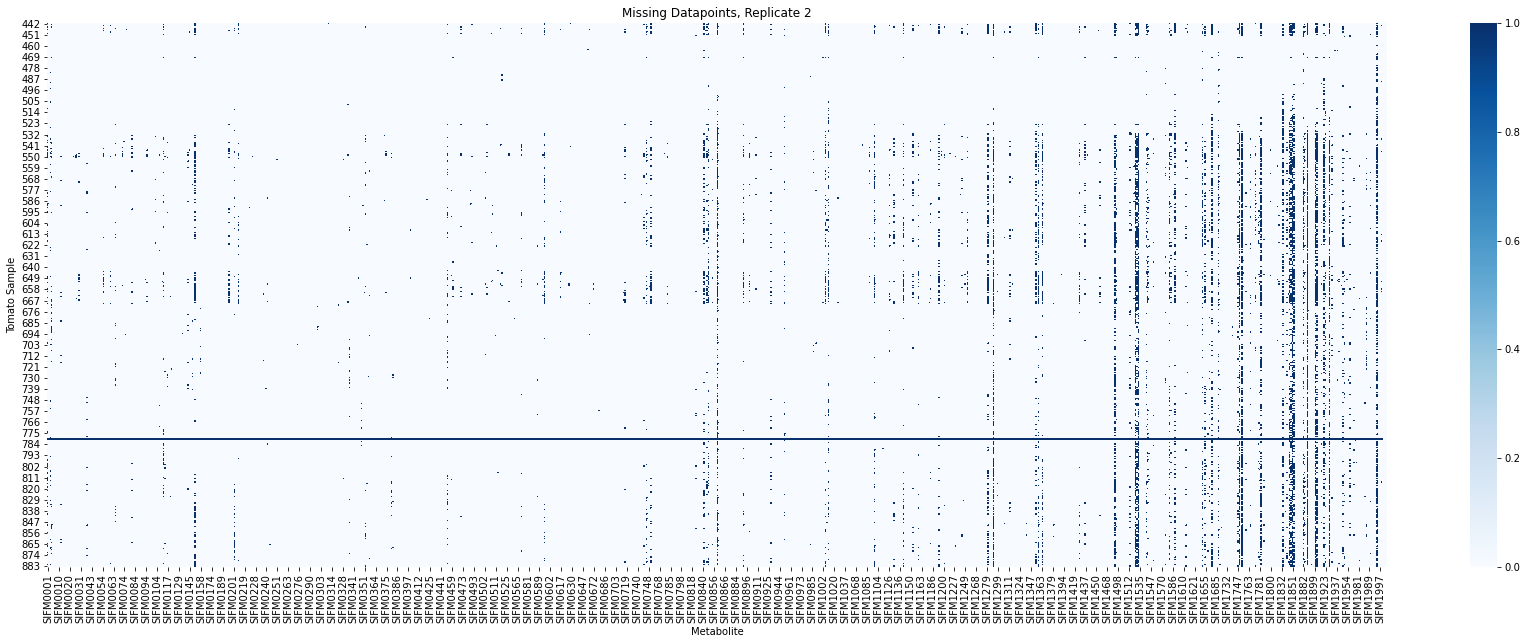

In [80]:
#heatmaps for missing data in individual replicates
plt.figure(figsize = (30, 10))
sns.heatmap(rep1_logged.isnull(), cmap = 'Blues')
plt.title('Missing Datapoints, Replicate 1')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')
plt.show()

plt.figure(figsize = (30, 10))
sns.heatmap(rep2_logged.isnull(), cmap = 'Blues')
plt.title('Missing Datapoints, Replicate 2')
plt.xlabel('Metabolite')
plt.ylabel('Tomato Sample')
plt.show()

In [81]:
#impute missing data for rep1
from sklearn.impute import KNNImputer
X = rep1_logged.iloc[:, :980]
imputer = KNNImputer(n_neighbors=2)
Xknn1 = imputer.fit_transform(X)
rep1_log_imputed = pd.DataFrame(data = Xknn1, columns = metab_list)
rep1_log_imputed

#impute missing data for rep1
X = rep2_logged.iloc[:, :980]
Xknn2 = imputer.fit_transform(X)
rep2_log_imputed = pd.DataFrame(data = Xknn2, columns = metab_list)
rep2_log_imputed

,SlFM0001,SlFM0002,SlFM0003,SlFM0004,SlFM0006,SlFM0007,SlFM0008,SlFM0009,SlFM0010,SlFM0011,...,SlFM1991,SlFM1992,SlFM1993,SlFM1994,SlFM1995,SlFM1996,SlFM1997,SlFM1998,SlFM1999,SlFM2000
0,10.058664,13.750975,12.047902,9.395965,16.309532,17.930181,16.499409,12.336912,15.646543,16.209047,...,17.821242,14.176604,14.397086,15.430668,8.968836,17.295679,15.404347,11.445918,16.955778,19.669818
1,8.524383,13.776051,10.972566,9.531084,16.112739,18.022671,16.880783,13.871351,16.867821,16.443515,...,14.906582,16.128613,12.706134,13.437172,8.503090,16.539596,14.414086,10.763034,16.978190,19.257916
2,9.606751,13.112625,12.860245,9.060867,15.089158,17.675865,17.270417,14.456873,15.573851,17.312950,...,17.482128,14.610380,13.953224,14.522489,9.001514,16.825113,14.612516,9.951440,16.613222,19.155233
3,8.504534,14.547586,11.352010,8.435099,16.573163,18.292996,16.548557,13.579385,16.904141,16.322960,...,16.555796,16.450170,13.818976,14.303404,8.998081,16.973984,15.291213,11.247105,17.117014,19.321167
4,10.307068,13.543681,11.158748,9.133789,14.607427,17.308733,15.392560,12.658011,14.822407,14.884788,...,13.891677,13.210568,11.835753,13.990747,8.483743,15.971438,13.916914,11.449546,16.079645,18.449926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,10.000189,13.936163,12.675841,9.478600,14.624741,17.828609,17.340807,14.991040,17.553716,17.398462,...,23.950252,19.822993,18.157413,11.764177,8.966716,15.879100,12.910282,11.257149,15.794451,19.381140
438,10.468286,12.769180,11.456564,9.069232,14.957574,17.021078,16.125175,13.359374,14.698847,15.828445,...,17.250746,16.087578,16.680485,16.781662,9.456651,19.610457,17.615740,13.208429,19.311543,19.932825
439,8.774860,11.887105,11.112715,10.909748,14.224565,17.404326,17.847987,14.574742,16.012664,17.758505,...,18.024032,18.310591,14.914554,16.280842,8.983234,19.437091,17.472995,12.535339,18.994294,20.355638
440,11.104315,13.885010,12.107643,9.396338,14.150081,17.638042,17.524258,14.292345,16.048507,17.254136,...,14.773224,15.600199,13.494643,14.952749,8.481937,17.585418,15.661823,12.523882,17.820140,20.045085


In [82]:
#average the two replicates
avg_logged_data = (rep1_log_imputed + rep2_log_imputed) / 2

## PCA

In [83]:
def plot_PCA(data): #function to plot color-coded PCA or similar plot
    
    PC = pd.DataFrame(data = data, columns = ['PC1', 'PC2'])
    PC['Group'] = df_final1['Group']
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    groups = ['BIG', 'CER', 'PIM']
    colors = ['orange', 'darkgreen', 'mediumblue']
    for group, color in zip(groups,colors): #for each group and each corresponding color
        indicesToKeep = PC['Group'] == group #filter out only those in the group
        ax.scatter(PC.loc[indicesToKeep, 'PC1'] #plot in specified color
                   , PC.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    ax.legend(groups)
    ax.grid()

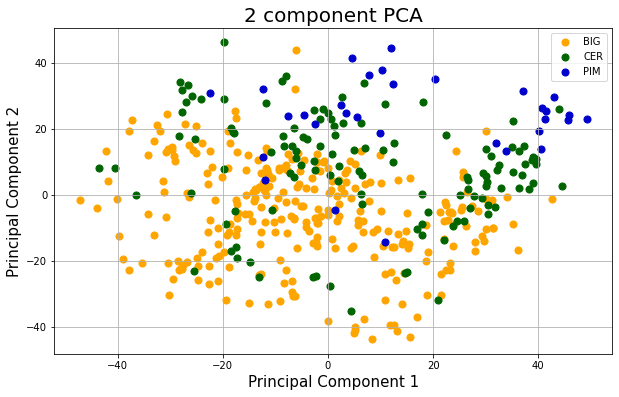

In [84]:
from sklearn.decomposition import PCA

X = avg_logged_data
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

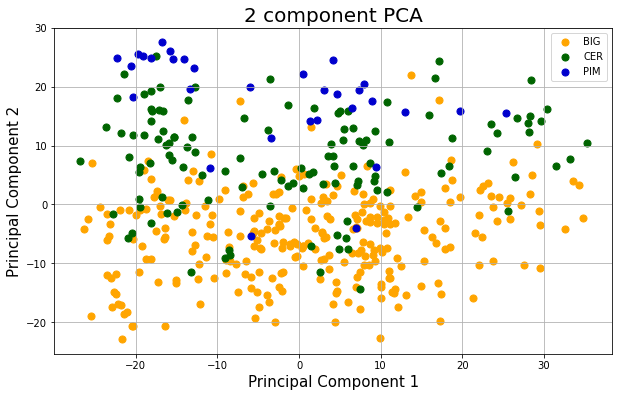

In [85]:
#scaling data can help
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(avg_logged_data)
prinC = pca.fit_transform(X)
plot_PCA(prinC)

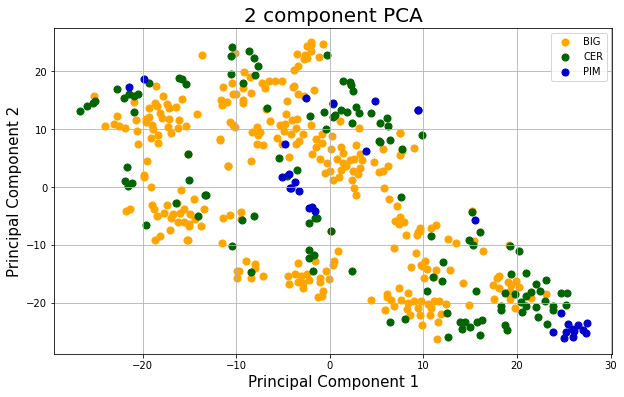

In [86]:
from sklearn.manifold import TSNE
# finding principle components
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(avg_logged_data)
plot_PCA(X_tsne)

,SlFM0001,SlFM0002,SlFM0003,SlFM0004,SlFM0006,SlFM0007,SlFM0008,SlFM0009,SlFM0010,SlFM0011,...,SlFM1992,SlFM1993,SlFM1994,SlFM1995,SlFM1996,SlFM1997,SlFM1998,SlFM1999,SlFM2000,Group
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#without kmeans filling in (pseudocount)
X = avg_logged_data_pc
avg_logged_data_pc = (rep1_logged.fillna(0) + rep2_logged.fillna(0))

pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [99]:
sig_metabolites = pd.read_csv('significant_metabolites.csv')
sig_metabolites = list(sig_metabolites['Chemical'].dropna())
sig_metabolites

['SlFM0004',
 'SlFM0006',
 'SlFM0013',
 'SlFM0015',
 'SlFM0023',
 'SlFM0038',
 'SlFM0042',
 'SlFM0043',
 'SlFM0052',
 'SlFM0058',
 'SlFM0061',
 'SlFM0064',
 'SlFM0070',
 'SlFM0076',
 'SlFM0081',
 'SlFM0085',
 'SlFM0108',
 'SlFM0109',
 'SlFM0114',
 'SlFM0116',
 'SlFM0118',
 'SlFM0120',
 'SlFM0121',
 'SlFM0127',
 'SlFM0138',
 'SlFM0151',
 'SlFM0160',
 'SlFM0161',
 'SlFM0166',
 'SlFM0184',
 'SlFM0189',
 'SlFM0194',
 'SlFM0195',
 'SlFM0197',
 'SlFM0201',
 'SlFM0206',
 'SlFM0219',
 'SlFM0220',
 'SlFM0221',
 'SlFM0224',
 'SlFM0233',
 'SlFM0240',
 'SlFM0243',
 'SlFM0245',
 'SlFM0246',
 'SlFM0256',
 'SlFM0258',
 'SlFM0265',
 'SlFM0275',
 'SlFM0278',
 'SlFM0284',
 'SlFM0288',
 'SlFM0289',
 'SlFM0293',
 'SlFM0294',
 'SlFM0300',
 'SlFM0308',
 'SlFM0311',
 'SlFM0313',
 'SlFM0322',
 'SlFM0324',
 'SlFM0328',
 'SlFM0329',
 'SlFM0332',
 'SlFM0335',
 'SlFM0348',
 'SlFM0350',
 'SlFM0355',
 'SlFM0358',
 'SlFM0359',
 'SlFM0363',
 'SlFM0365',
 'SlFM0370',
 'SlFM0373',
 'SlFM0376',
 'SlFM0382',
 'SlFM0387',

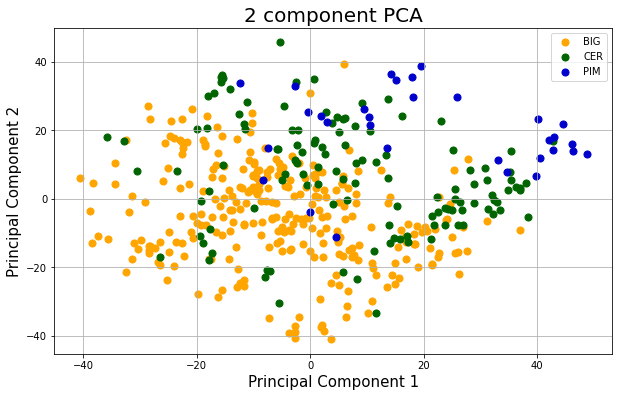

In [100]:
#with all significant metabolites as filter

X = avg_logged_data[sig_metabolites]
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

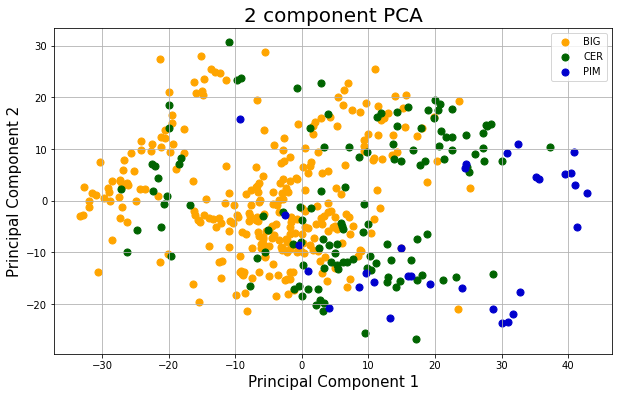

In [101]:
#with sig metabolites between PIM and CER
X = avg_logged_data[sig_metabolites[:338]]
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)

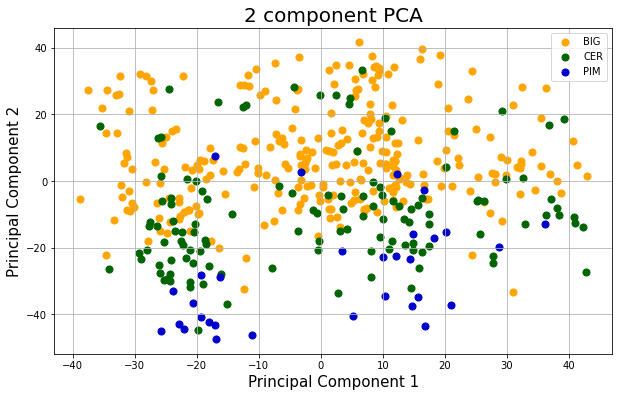

In [62]:
#sparse PCA, one more attempt
X = avg_logged_data
from sklearn.decomposition import SparsePCA
# finding principle components
spca = SparsePCA(n_components=2)
spca.fit(X)
X_spca = spca.transform(X)
plot_PCA(X_spca)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


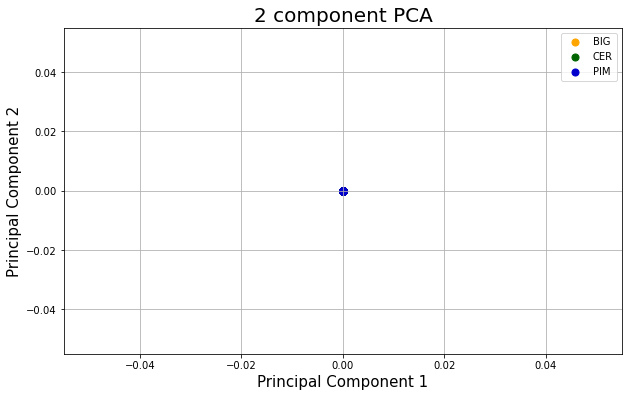

In [106]:
#pca with nan filled in as 0, something seems to have broken here when i copied to a new notebook
averaged = (rep1_logged.fillna(0).iloc[:, :980] + rep2_logged.fillna(0).iloc[:, :980])/2
X = averaged.fillna(0)
pca = PCA(n_components = 2)
prinC = pca.fit_transform(X)

plot_PCA(prinC)